# Weather Data Regression with Extra Trees Regressor

## Import Necessary Libraries

In [1]:
# Importing essential libraries for data manipulation, machine learning, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Load and Preprocess Data

We load the weather datasets (real-time, historical, forecast) and perform basic preprocessing like standardizing column names and cleaning the data by removing rows with missing values.


In [2]:
# Load datasets
real_time_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\weather_data.csv', encoding='latin1')
historical_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\historical_hourly_data.csv', encoding='latin1')
forecast_24h_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\24_hour_forecast.csv', encoding='latin1')
forecast_14d_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\14_day_forecast.csv', encoding='latin1')

In [4]:
# Data Preprocessing
common_columns = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'pressure', 'wind_speed', 'datetime']

In [5]:
# Merge all datasets into one dataframe
weather_df = pd.concat([real_time_df, historical_df, forecast_24h_df, forecast_14d_df], ignore_index=True)

In [6]:
# Select relevant features for the model
columns_to_keep = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'pressure', 'wind_speed']
weather_df = weather_df[columns_to_keep].dropna()

In [20]:
weather_df.head()

,temperature_celsius,feels_like_celsius,humidity,pressure,wind_speed
0,10.80,9.87,74,999,4.92
1,10.97,10.03,73,999,5.66
2,-1.44,-7.10,86,1015,5.66
3,-2.24,-6.49,73,1018,3.33
4,-7.01,-11.42,79,1027,2.57


Y-data Profile:
[Exploratory Data Analysis Report - Laptop Dataset](https://sandeepmondkar14.github.io/regression-model)

## 2. Split Data into Features and Target Variable
Here, we define `X` as the features (independent variables) and `y` as the target variable (temperature in Celsius).

In [7]:
# Define X and y
X = weather_df.drop('temperature_celsius', axis=1)
y = weather_df['temperature_celsius']

## 3. Train-Test Split

We split the data into training and testing sets to evaluate the model performance on unseen data.

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train Extra Trees Regressor
We initialize the Extra Trees Regressor model and train it using the training data.

In [10]:
# Initialize the Extra Trees Regressor model
et_model = ExtraTreesRegressor(random_state=42)

# Train the model
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

## 5. Hyperparameter Tuning using GridSearchCV

We tune the hyperparameters of the model using GridSearchCV to find the optimal settings that improve performance.

In [11]:
# Model Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [12]:
# Best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## 6. Make Predictions

We use the best model found by GridSearchCV to make predictions on the test set.

In [13]:
# Make predictions on the test data
y_pred = grid_search.predict(X_test)

## 7. Model Evaluation

Now we evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.

In [14]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.2586
MSE: 0.2305
RMSE: 0.4801
R² Score: 0.9924


## 8. Visual Diagnostics

### Actual vs Predicted Temperatures
We plot the actual vs predicted temperatures to visually inspect the model's performance.

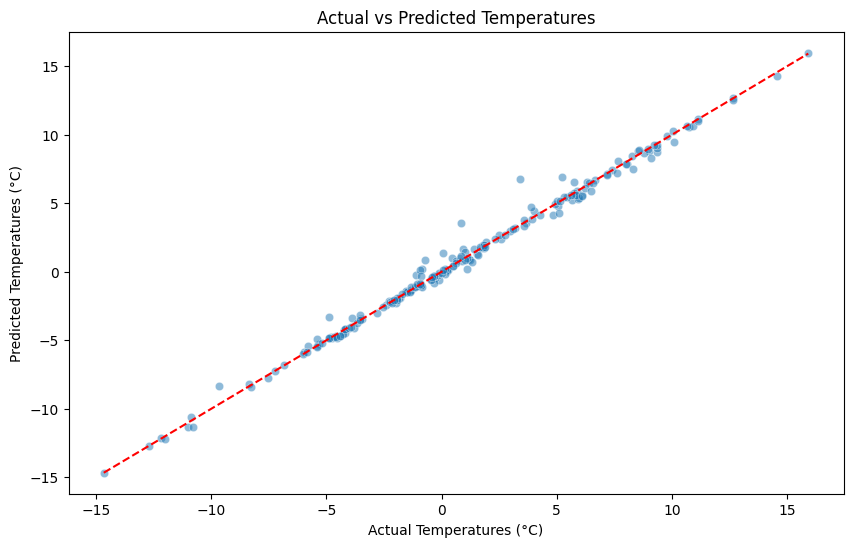

In [15]:
# Visual Diagnostics - Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperatures (°C)")
plt.ylabel("Predicted Temperatures (°C)")
plt.title("Actual vs Predicted Temperatures")
plt.show()

### Residuals Plot

We plot the residuals (errors) to check for patterns. Ideally, they should be randomly distributed with no obvious patterns.

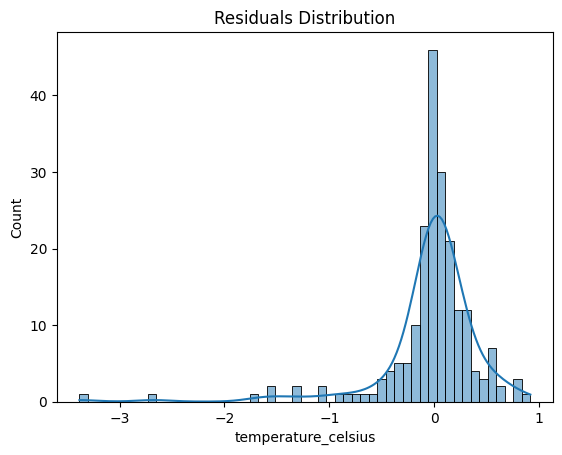

In [16]:
# Residuals Plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

### Feature Importance

We visualize the feature importance of the model to understand which features most influence the temperature predictions.

In [17]:
# Feature Importance
importances = et_model.feature_importances_
features = X.columns

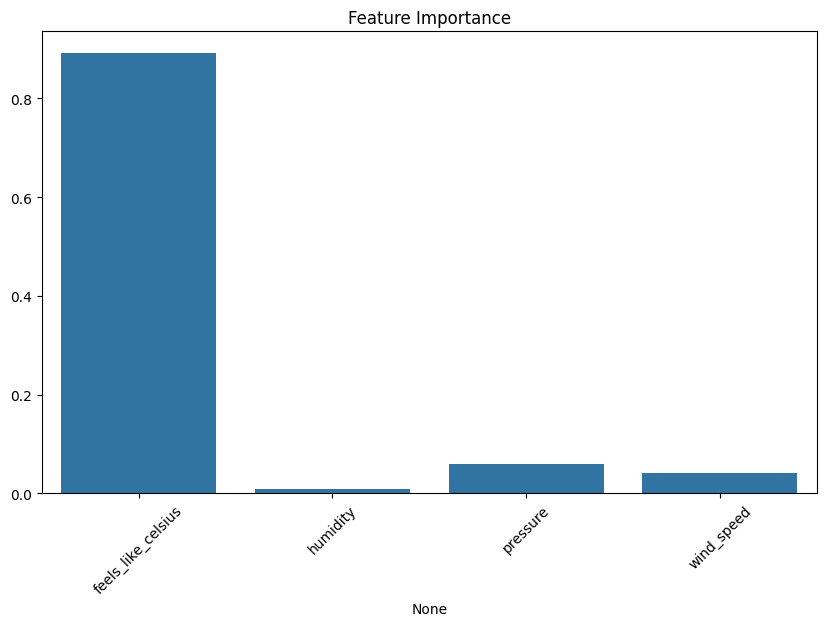

In [18]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

## 9. Conclusion

The model is evaluated with excellent performance metrics, and the predictions are very close to the actual values. The feature importance analysis shows that certain features like humidity, pressure, and wind speed are key drivers for predicting temperature.

We have successfully built a regression model to predict the temperature using Extra Trees Regressor, tuned it using GridSearchCV, and visualized the results for further analysis.
